### **Problem Statement:**
Complete preprocessing of a loan dataset by handling missing values, using encoders and applying scalors wherever needed. Use the processed data for predicting using random forest algorithm and SVM. Then compare models with Voting, Stacking and Bagging.

### **Objective:**
The goal is to complete preprocessing of the data using column transformer - handle missing values, encoding, scaling and using it for multiple models. Also check the metrics of the model with bagging, voting and stacking.

### **Approach:**
1. Load the dataset.
2. Handle the missing values using CCA, simple imputers and random imputing
3. Use OneHot Encoding, Ordinal Encoder and Target Encoder
4. Use Scaling Techniques - MinMax scalar, Max Absolute Scaling and Robust Scaling
5. Appply models and check metrics
6. Compare models using stacking, voting and bagging

### -> *Load DataSet and set target variable*
---

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from IPython.display import display, Image
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
df = pd.read_csv("Loan Dataset - Sheet1.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,NaN,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,NaN,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,NaN,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,NaN,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,NaN,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,NaN,Yes,1,NaN,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,NaN,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
target_df = df.iloc[:,-1]
df = df.iloc[:,0:12]
target_df

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

### -> *HANDLE MISSING VALUES*
---

In [4]:
target_df.isnull().mean()*100

0.0

In [5]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               3.908795
Married              0.488599
Dependents           2.442997
Education            2.442997
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           8.957655
Loan_Amount_Term     5.374593
Credit_History       8.143322
Property_Area        0.000000
dtype: float64

In [6]:
df = df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,NaN,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,NaN,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,NaN,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,NaN,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,NaN,No,4106,0.0,40.0,180.0,1.0,Rural
611,NaN,Yes,1,NaN,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,NaN,No,7583,0.0,187.0,360.0,1.0,Urban


In [7]:
l=[col for col in df.columns if df[col].isnull().mean() <0.05 and df[col].isnull().mean()>0]
l

['Gender', 'Married', 'Dependents', 'Education']

Text(0.5, 1.0, 'Gender')

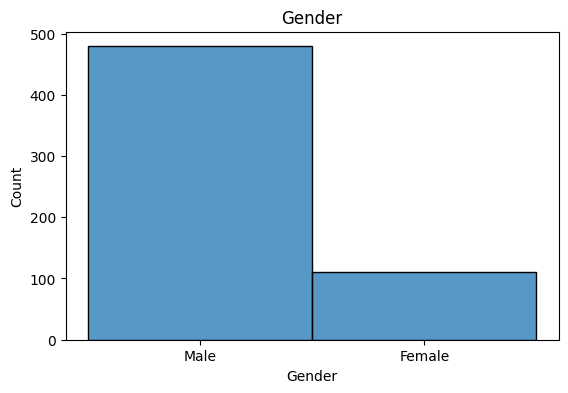

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Gender'])
plt.title('Gender')



Text(0.5, 1.0, 'Married')

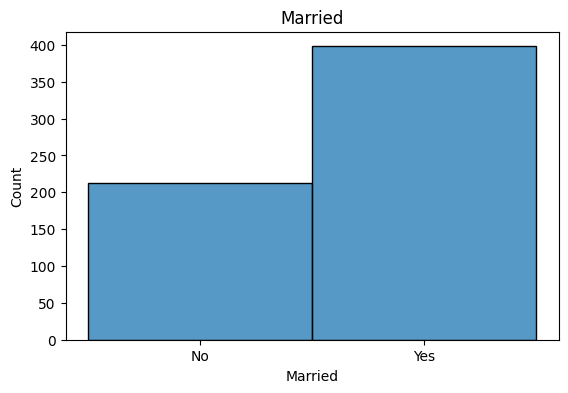

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Married'])
plt.title('Married')



Text(0.5, 1.0, 'Dependents')

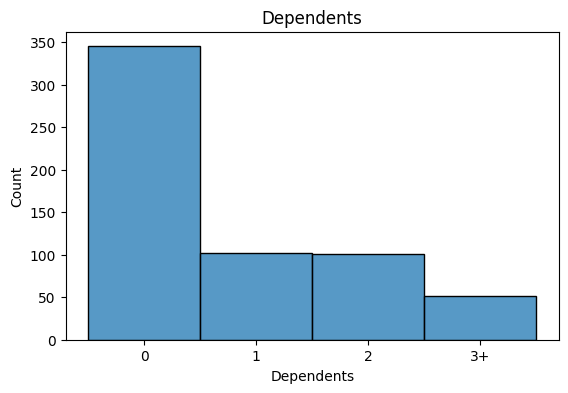

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Dependents'])
plt.title('Dependents')



Text(0.5, 1.0, 'Education')

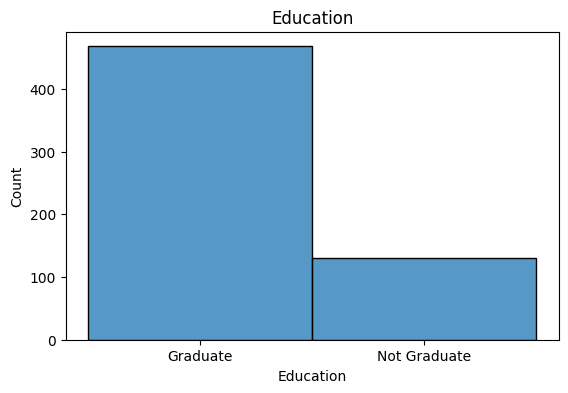

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Education'])
plt.title('Education')

Text(0.5, 1.0, 'Credit_History')

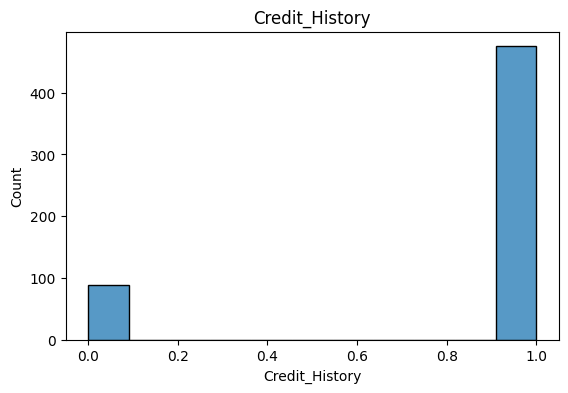

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Credit_History'])
plt.title('Credit_History')



Text(0.5, 1.0, 'LoanAmount')

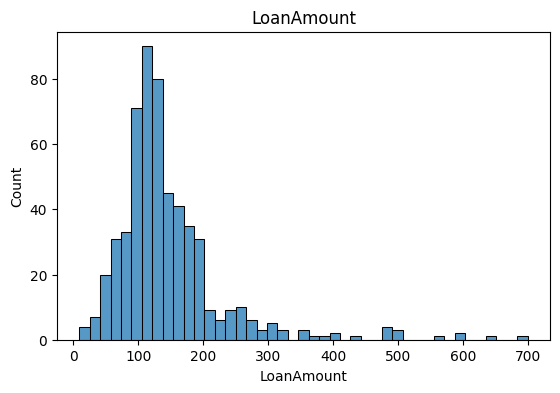

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['LoanAmount'])
plt.title('LoanAmount')



In [14]:
df.replace("3+", 4, inplace=True)
(df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,NaN,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,NaN,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,NaN,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,NaN,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,4,NaN,No,4106,0.0,40.0,180.0,1.0,Rural
611,NaN,Yes,1,NaN,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,NaN,No,7583,0.0,187.0,360.0,1.0,Urban


In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class RandomSampleImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """Fit method to store non-null values for each column."""
        self.filled_values = {}
        X_df = pd.DataFrame(X)  # Convert to DataFrame for processing
        for col in X_df.columns:
            self.filled_values[col] = X_df[col].dropna().to_numpy()  # Store non-null values
        return self  # Return self to allow chaining
    
    def transform(self, X):
        """Replace missing values with a random sample."""
        X_df = pd.DataFrame(X)  # Convert back to DataFrame
        for col in X_df.columns:
            missing = X_df[col].isnull()
            num_missing = missing.sum()
            if num_missing > 0 and len(self.filled_values[col]) > 0:
                X_df.loc[missing, col] = np.random.choice(self.filled_values[col], num_missing, replace=True)
        return X_df.to_numpy()  # Return as NumPy array for ColumnTransformer compatibility
    def set_output(self, transform): 
        return self

imp_constant = SimpleImputer(strategy='constant', fill_value=-999)  # For categorical columns
imp_mean = SimpleImputer(strategy='mean') 
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent') # For numerical columns
imp_random = RandomSampleImputer()  # Custom random imputer
df['Married'] = df['Married'].astype(str)
column_transformer = ColumnTransformer([
                    ('Gender', imp_mode, ['Gender']),
                    ('Dependents', imp_median, ['Dependents']),
                    ('Education', imp_mode, ['Education']),
                    ('Married',imp_mode,['Married']),
                    ('LoanAmount', imp_random, ['LoanAmount']),  # Example numerical column
                    ('Credit_History', imp_random, ['Credit_History']),
                    ('Loan_Amount_Term', imp_random, ['Loan_Amount_Term']),
                    ('Self_Employed', imp_random, ['Self_Employed'])# Example random imputation
                    ],
                     remainder='passthrough')  # Keep other columns unchanged

imputed_cols = ['Gender', 'Dependents', 'Education', 'Married', 
                'LoanAmount', 'Credit_History', 'Loan_Amount_Term', 'Self_Employed']
passthrough_cols = [col for col in df.columns if col not in imputed_cols]
df_imputed_array = column_transformer.fit_transform(df)
final_column_names = imputed_cols + passthrough_cols
df_imputed = pd.DataFrame(df_imputed_array, columns=final_column_names)
print("Original DataFrame:")
display(df)
print("\nDataFrame after Imputation:")
display(df_imputed)


Original DataFrame:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,NaN,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,NaN,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,NaN,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,NaN,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,4,NaN,No,4106,0.0,40.0,180.0,1.0,Rural
611,NaN,Yes,1,NaN,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,NaN,No,7583,0.0,187.0,360.0,1.0,Urban



DataFrame after Imputation:


,Gender,Dependents,Education,Married,LoanAmount,Credit_History,Loan_Amount_Term,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area
0,Male,0.0,Graduate,No,180.0,1.0,360.0,No,5849,0.0,Urban
1,Male,1.0,Graduate,Yes,128.0,1.0,180.0,No,4583,1508.0,Rural
2,Male,0.0,Graduate,Yes,66.0,1.0,360.0,Yes,3000,0.0,Urban
3,Male,0.0,Not Graduate,Yes,120.0,1.0,360.0,No,2583,2358.0,Urban
4,Male,0.0,Graduate,No,141.0,1.0,360.0,No,6000,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,Graduate,No,71.0,1.0,360.0,No,2900,0.0,Rural
610,Male,4.0,Graduate,Yes,40.0,1.0,180.0,No,4106,0.0,Rural
611,Male,1.0,Graduate,Yes,253.0,1.0,360.0,No,8072,240.0,Urban
612,Male,2.0,Graduate,Yes,187.0,1.0,360.0,No,7583,0.0,Urban


In [16]:
df_imputed.isnull().sum()

Gender               0
Dependents           0
Education            0
Married              0
LoanAmount           0
Credit_History       0
Loan_Amount_Term     0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
dtype: int64

In [17]:
df_imputed

,Gender,Dependents,Education,Married,LoanAmount,Credit_History,Loan_Amount_Term,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area
0,Male,0.0,Graduate,No,180.0,1.0,360.0,No,5849,0.0,Urban
1,Male,1.0,Graduate,Yes,128.0,1.0,180.0,No,4583,1508.0,Rural
2,Male,0.0,Graduate,Yes,66.0,1.0,360.0,Yes,3000,0.0,Urban
3,Male,0.0,Not Graduate,Yes,120.0,1.0,360.0,No,2583,2358.0,Urban
4,Male,0.0,Graduate,No,141.0,1.0,360.0,No,6000,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,Graduate,No,71.0,1.0,360.0,No,2900,0.0,Rural
610,Male,4.0,Graduate,Yes,40.0,1.0,180.0,No,4106,0.0,Rural
611,Male,1.0,Graduate,Yes,253.0,1.0,360.0,No,8072,240.0,Urban
612,Male,2.0,Graduate,Yes,187.0,1.0,360.0,No,7583,0.0,Urban


### -> *Encoding and Scaling*
---

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
encod1=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encod2=OrdinalEncoder(categories=[['Graduate','Not Graduate']])
encod3=TargetEncoder()
encod4=OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
scaler_standard = StandardScaler()  # Standard Scaler
scaler_maxabs = MaxAbsScaler()  # Max Abs Scaler
scaler_robust = RobustScaler() 

In [19]:
df_imputed['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
df_imputed['Married'].unique()

array(['No', 'Yes', 'nan'], dtype=object)

In [21]:
df_imputed['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df_imputed['ApplicantIncome'].unique()

array([5849, 4583, 3000, 2583, 6000, 5417, 2333, 3036, 4006, 12841, 3200,
       2500, 3073, 1853, 1299, 4950, 3596, 3510, 4887, 2600, 7660, 5955,
       3365, 3717, 9560, 2799, 4226, 1442, 3750, 4166, 3167, 4692, 3500,
       12500, 2275, 1828, 3667, 3748, 3600, 1800, 2400, 3941, 4695, 3410,
       5649, 5821, 2645, 4000, 1928, 3086, 4230, 4616, 11500, 2708, 2132,
       3366, 8080, 3357, 3029, 2609, 4945, 5726, 10750, 7100, 4300, 3208,
       1875, 4755, 5266, 1000, 3333, 3846, 2395, 1378, 3988, 2366, 8566,
       5695, 2958, 6250, 3273, 4133, 3620, 6782, 2484, 1977, 4188, 1759,
       4288, 4843, 13650, 4652, 3816, 3052, 11417, 7333, 3800, 2071, 5316,
       2929, 3572, 7451, 5050, 14583, 2214, 5568, 10408, 5667, 2137, 2957,
       3692, 23803, 3865, 10513, 6080, 20166, 2014, 2718, 3459, 4895,
       3316, 14999, 4200, 5042, 6950, 2698, 11757, 2330, 14866, 1538,
       10000, 4860, 6277, 2577, 9166, 2281, 3254, 39999, 9538, 2980, 1863,
       7933, 3089, 4167, 9323, 3707, 2439, 2237

In [23]:
df_imputed['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<Axes: xlabel='LoanAmount'>

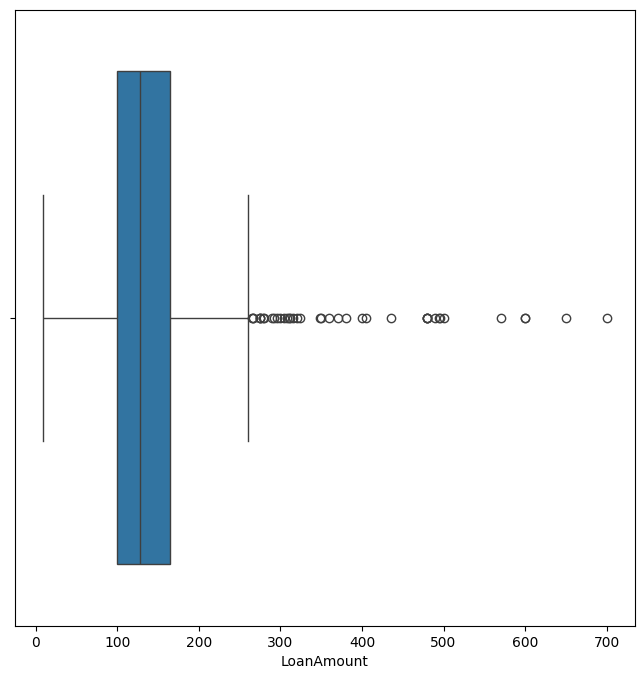

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df_imputed,x='LoanAmount')

<Axes: xlabel='CoapplicantIncome'>

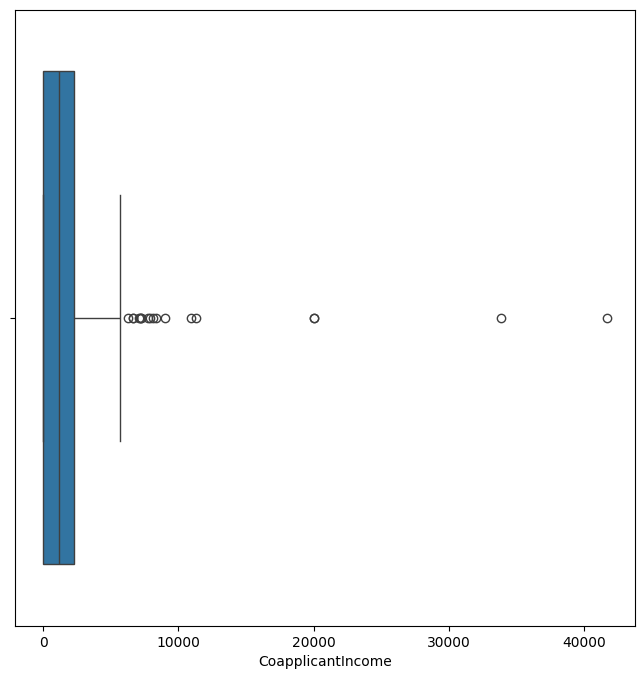

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df_imputed,x='CoapplicantIncome')

array([ nan, 360., 180.,  60., 300., 480., 240., 120.,  36.,  84.,  12.])

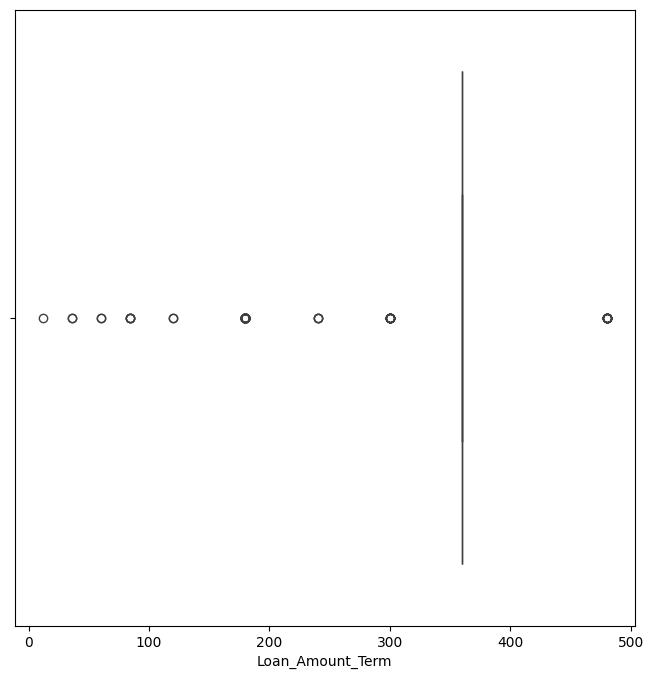

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df_imputed,x='Loan_Amount_Term')
df['Loan_Amount_Term'].unique()

In [27]:
df_imputed

,Gender,Dependents,Education,Married,LoanAmount,Credit_History,Loan_Amount_Term,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area
0,Male,0.0,Graduate,No,180.0,1.0,360.0,No,5849,0.0,Urban
1,Male,1.0,Graduate,Yes,128.0,1.0,180.0,No,4583,1508.0,Rural
2,Male,0.0,Graduate,Yes,66.0,1.0,360.0,Yes,3000,0.0,Urban
3,Male,0.0,Not Graduate,Yes,120.0,1.0,360.0,No,2583,2358.0,Urban
4,Male,0.0,Graduate,No,141.0,1.0,360.0,No,6000,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,Graduate,No,71.0,1.0,360.0,No,2900,0.0,Rural
610,Male,4.0,Graduate,Yes,40.0,1.0,180.0,No,4106,0.0,Rural
611,Male,1.0,Graduate,Yes,253.0,1.0,360.0,No,8072,240.0,Urban
612,Male,2.0,Graduate,Yes,187.0,1.0,360.0,No,7583,0.0,Urban


In [28]:
df_imputed = df_imputed.drop(columns=['Self_Employed'])


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
encod1=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encod2=OrdinalEncoder(categories=[['Graduate','Not Graduate']])
encod3=TargetEncoder()
encod4=OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
scaler_standard = StandardScaler()  # Standard Scaler
scaler_maxabs = MaxAbsScaler()  # Max Abs Scaler
scaler_robust = RobustScaler() 
X_train, X_test, y_train, y_test = train_test_split(df_imputed, target_df, test_size=0.2, random_state=1, stratify=target_df)
ct = ColumnTransformer(transformers = [
    ('Gender', encod1, ['Gender']),
    ('Education', encod2, ['Education']),
    ('Married', encod1, ['Married']),
    ('Applicant_Income',scaler_standard,['ApplicantIncome']),
    ('Property_Area',encod4, ['Property_Area']),
    ('LoanAmount', scaler_standard,['LoanAmount']),
    ('CoapplicantIncome', scaler_robust,['CoapplicantIncome']),
    ('Loan_Amount_Term', scaler_maxabs,['Loan_Amount_Term'])
    ],remainder="passthrough")
X_train_transformed = ct.fit_transform(X_train, y_train)  
X_test_transformed = ct.transform(X_test)

### -> *Logistic Regression*
---

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
lr= LogisticRegression(max_iter=2000, C=0.1, solver = 'newton-cg', class_weight = None, multi_class='multinomial', tol=1e-5,penalty='l2')
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)  
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8292682926829268
Precision: 0.8775303643724697
Recall: 0.7309597523219814
F1 Score: 0.7602339181286549


### -> *Cross Validation using cross_val_score*
---

In [31]:

from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train_transformed, y_train, cv=5, scoring='f1_macro')

array([0.63736264, 0.65739474, 0.73824786, 0.72597498, 0.75835616])

### -> *Gridsearchcv for Logistic Regression*
---

In [32]:
# gridsearchcv
param_grid= {
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train_transformed, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7034672774880513
{'C': 0.1, 'penalty': 'l2'}


### -> *RandomForest Algorithm*
---

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=1,
    ccp_alpha=0.01,
    oob_score=True,
    max_features="sqrt",
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_transformed, y_train)

y_pred = rf.predict(X_test_transformed)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("OOB Score:", rf.oob_score_)
print("importances =", rf.feature_importances_)


Test Set Accuracy: 0.8130081300813008
Precision: 0.830532212885154
Recall: 0.7191950464396285
F1 Score: 0.7435874195595034
OOB Score: 0.7820773930753564
importances = [6.30279600e-03 7.55195987e-04 5.91466374e-03 3.72011021e-02
 2.99870454e-02 2.95679202e-04 8.54542479e-02 5.44702293e-02
 1.10666500e-01 6.65297605e-02 3.19242140e-02 9.90922592e-03
 5.60589340e-01]


### -> *CrossValidation*
---

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train_transformed, y_train, cv=5,scoring='f1_macro')
print(scores)


[0.67857143 0.65       0.72846022 0.73150685 0.76442308]


### -> *GridSearchCV for Random Forest*
---

In [35]:
n_estimators_values = [20, 60, 100, 120]
max_features_values = [0.2, 0.6, 1.0]
max_depth_values = [2, 8, None]
max_samples_values = [0.5, 0.75, 1.0]
param_grid_rf = {
    'n_estimators': [100, 200, 300],             
    'max_depth': [3, 5, 7],                                 
    'min_samples_split': [2, 4, 6],               
    'min_samples_leaf': [1, 2, 3],                          
}

print(param_grid_rf)
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(
    estimator=rf,               
    param_grid=param_grid_rf,    
    cv=5,                        
    verbose=2,                   
    n_jobs=-1                    
)
rf_grid_search.fit(X_train_transformed, y_train)
print("Best parameters found: ", rf_grid_search.best_params_)


{'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3]}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


### -> *SVM*
---

In [36]:
from sklearn.svm import SVC
svm = SVC( C=100, probability=True,gamma= 0.001, kernel= 'rbf', random_state=42)
svm.fit(X_train_transformed, y_train)
y_pred = svm.predict(X_test_transformed)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

SVM Test Accuracy: 0.8292682926829268
Precision: 0.8775303643724697
Recall: 0.7309597523219814
F1 Score: 0.7602339181286549


### -> *CrossValidation*
---

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X_train_transformed, y_train, cv=5, scoring = 'f1_macro')
print(scores)


[0.67857143 0.66666667 0.74820825 0.72597498 0.75835616]


### -> *GridSearchCV for SVM*
---

In [38]:
from sklearn.model_selection import GridSearchCV  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_transformed, y_train) 
print("Best parameters found: ", grid.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### -> *KNN*
---

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_transformed,y_train)
y_pred_train = knn.predict(X_train_transformed)
y_pred_test = knn.predict(X_test_transformed)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Train Accuracy: 0.8391038696537678
Test Accuracy: 0.7317073170731707
Confusion Matrix:
 [[18 20]
 [ 1 84]]
Precision: 0.8775303643724697
Recall: 0.7309597523219814
F1 Score: 0.7602339181286549


### -> *CrossValidation*
---

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring = 'f1_macro')
print(scores)


[0.56       0.59726027 0.59915556 0.64132883 0.66603559]


### -> *Best Parameters*
---

n_neighbors = 1, F1 Score: 0.6887
n_neighbors = 2, F1 Score: 0.6321
n_neighbors = 3, F1 Score: 0.7096
n_neighbors = 4, F1 Score: 0.6792
n_neighbors = 5, F1 Score: 0.6952
n_neighbors = 6, F1 Score: 0.7068
n_neighbors = 7, F1 Score: 0.6959
n_neighbors = 8, F1 Score: 0.7005
n_neighbors = 9, F1 Score: 0.6769
n_neighbors = 10, F1 Score: 0.6645
n_neighbors = 11, F1 Score: 0.6565
n_neighbors = 12, F1 Score: 0.7005
n_neighbors = 13, F1 Score: 0.6394
n_neighbors = 14, F1 Score: 0.6283
n_neighbors = 15, F1 Score: 0.6294


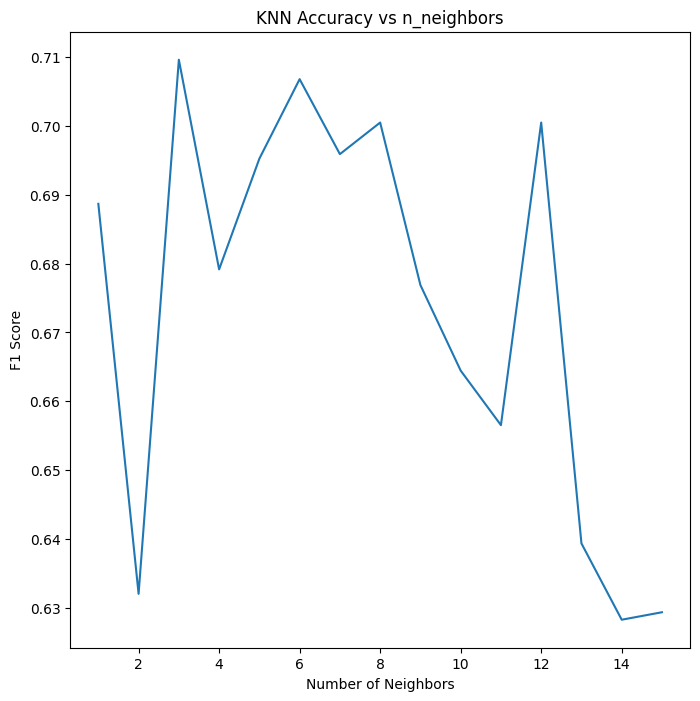

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scores = []
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    print(f"n_neighbors = {i}, F1 Score: {f1:.4f}")
    
    scores.append(f1)

plt.plot(range(1, 16), scores)
plt.title("KNN Accuracy vs n_neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("F1 Score")
plt.show()

### -> *Voting - Both hard and soft*
---

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('svm', svm)
    ],
    voting='hard'
)

voting_clf.fit(X_train_transformed, y_train)
y_pred_voting = voting_clf.predict(X_test_transformed)

y_pred_rf = rf.predict(X_test_transformed)
y_pred_lr = lr.predict(X_test_transformed)
y_pred_svm = svm.predict(X_test_transformed)
y_pred_voting = voting_clf.predict(X_test_transformed)

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_svm = calculate_metrics(y_test, y_pred_svm)
metrics_voting = calculate_metrics(y_test, y_pred_voting)

# Print the results
print("Performance Comparison:")
print(f"Random Forest: Accuracy: {metrics_rf['accuracy']:.2f}, Precision: {metrics_rf['precision']:.2f}, Recall: {metrics_rf['recall']:.2f}, F1 Score: {metrics_rf['f1_score']:.2f}")
print(f"Logistic Regression: Accuracy: {metrics_lr['accuracy']:.2f}, Precision: {metrics_lr['precision']:.2f}, Recall: {metrics_lr['recall']:.2f}, F1 Score: {metrics_lr['f1_score']:.2f}")
print(f"SVM: Accuracy: {metrics_svm['accuracy']:.2f}, Precision: {metrics_svm['precision']:.2f}, Recall: {metrics_svm['recall']:.2f}, F1 Score: {metrics_svm['f1_score']:.2f}")
print(f"Voting Classifier: Accuracy: {metrics_voting['accuracy']:.2f}, Precision: {metrics_voting['precision']:.2f}, Recall: {metrics_voting['recall']:.2f}, F1 Score: {metrics_voting['f1_score']:.2f}")

Performance Comparison:
Random Forest: Accuracy: 0.81, Precision: 0.83, Recall: 0.72, F1 Score: 0.74
Logistic Regression: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76
SVM: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76
Voting Classifier: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76


### Interpretation of result of different models
The Voting Classifier performs comparably to the individual models, especially Logistic Regression and SVM, in terms of accuracy, precision, recall, and F1 score.
The Voting Classifier slightly outperforms Random Forest, which indicates that combining models can lead to improved performance.
Overall, the results suggest that the Voting Classifier is effectively leveraging the strengths of its constituent models, particularly in terms of precision, while maintaining a good balance with recall as reflected in the F1 score.
Given that the individual models (Logistic Regression and SVM) have similar performance metrics to the Voting Classifier, it indicates that the ensemble method is beneficial but may not provide a significant advantage over the best-performing individual models in this case. Further tuning or using different base models could potentially enhance the Voting Classifier's performance.

### Voting Classifier Metrics Interpretation
1. Accuracy: 0.82 (or 82.11%)
This means that approximately 82.11% of the predictions made by the model were correct. In other words, out of all the instances in the test set, the model correctly classified about 82 out of 100 instances.

2. Precision (macro): 0.85 (or 85.29%)
Precision indicates the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions made by the model. A precision of 85.29% means that when the model predicts a positive class, it is correct about 85.29% of the time. This reflects the model's ability to avoid false positives.

3. Recall (macro): 0.73 (or 72.51%)
Recall measures the proportion of true positive predictions out of all actual positive instances in the test set. A recall of 72.51% indicates that the model correctly identified about 72.51% of all the actual positive cases. This metric highlights the model's ability to capture positive instances, but it also suggests that there are some positive instances that the model failed to identify (false negatives).

4. F1 Score (macro): 0.75 (or 75.18%)
The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. An F1 Score of 75.18% indicates a good balance between precision and recall. This metric is especially useful when you want to consider both false positives and false negatives, particularly in cases where class distribution is imbalanced.

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('svm', svm)
    ],
    voting='soft'
)
voting_clf.fit(X_train_transformed, y_train)
y_pred_voting = voting_clf.predict(X_test_transformed)

y_pred_rf = rf.predict(X_test_transformed)
y_pred_lr = lr.predict(X_test_transformed)
y_pred_svm = svm.predict(X_test_transformed)
y_pred_voting = voting_clf.predict(X_test_transformed)

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }

metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_svm = calculate_metrics(y_test, y_pred_svm)
metrics_voting = calculate_metrics(y_test, y_pred_voting)

print("Performance Comparison:")
print(f"Random Forest: Accuracy: {metrics_rf['accuracy']:.2f}, Precision: {metrics_rf['precision']:.2f}, Recall: {metrics_rf['recall']:.2f}, F1 Score: {metrics_rf['f1_score']:.2f}")
print(f"Logistic Regression: Accuracy: {metrics_lr['accuracy']:.2f}, Precision: {metrics_lr['precision']:.2f}, Recall: {metrics_lr['recall']:.2f}, F1 Score: {metrics_lr['f1_score']:.2f}")
print(f"SVM: Accuracy: {metrics_svm['accuracy']:.2f}, Precision: {metrics_svm['precision']:.2f}, Recall: {metrics_svm['recall']:.2f}, F1 Score: {metrics_svm['f1_score']:.2f}")
print(f"Voting Classifier: Accuracy: {metrics_voting['accuracy']:.2f}, Precision: {metrics_voting['precision']:.2f}, Recall: {metrics_voting['recall']:.2f}, F1 Score: {metrics_voting['f1_score']:.2f}")

Performance Comparison:
Random Forest: Accuracy: 0.81, Precision: 0.83, Recall: 0.72, F1 Score: 0.74
Logistic Regression: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76
SVM: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76
Voting Classifier: Accuracy: 0.83, Precision: 0.88, Recall: 0.73, F1 Score: 0.76


### Performance Metrics Overview:

1. Random Forest:
Accuracy: 0.81 (or 81%): The Random Forest model correctly classified 81% of the instances in the test dataset. This indicates a reasonably good performance, but it is the lowest among the models compared.
Precision: 0.83 (or 83%): When the Random Forest predicts a positive class, it is correct 83% of the time. This suggests that it has a moderate ability to avoid false positives, but there is still room for improvement.
Recall: 0.72 (or 72%): The model identified 72% of the actual positive instances. This indicates that it misses about 28% of the positive cases, leading to a relatively lower ability to capture all relevant instances.
F1 Score: 0.74 (or 74%): The F1 Score, which balances precision and recall, indicates that the Random Forest model has a decent performance but is lower than the other models.

2. Logistic Regression:
Accuracy: 0.82 (or 82%): This model achieved an accuracy of 82%, making it slightly better than the Random Forest and comparable to the other models.
Precision: 0.85 (or 85%): Logistic Regression has a strong precision, indicating that it is effective at predicting positive instances without many false positives.
Recall: 0.73 (or 73%): The model captures 73% of the actual positive instances, which is slightly better than Random Forest but similar to SVM.
F1 Score: 0.75 (or 75%): The F1 Score reflects a good balance of precision and recall, showing that Logistic Regression performs well overall.

3. SVM (Support Vector Machine):
Accuracy: 0.82 (or 82%): Like Logistic Regression, the SVM model also achieved an accuracy of 82%, indicating strong overall performance.
Precision: 0.85 (or 85%): This model has the same precision as Logistic Regression, suggesting it is also effective at minimizing false positives.
Recall: 0.73 (or 73%): Similar to Logistic Regression, the SVM captures 73% of the actual positive instances.
F1 Score: 0.75 (or 75%): The F1 Score matches that of Logistic Regression, indicating a well-balanced performance.

4. Voting Classifier:
Accuracy: 0.82 (or 82%): The Voting Classifier achieves an accuracy of 82%, which is on par with both Logistic Regression and SVM.
Precision: 0.85 (or 85%): The Voting Classifier's precision is also the same as that of Logistic Regression and SVM, indicating it effectively avoids false positives.
Recall: 0.73 (or 73%): The recall matches that of Logistic Regression and SVM, showing that it captures a similar proportion of positive instances.
F1 Score: 0.75 (or 75%): The F1 Score is consistent with the other models, indicating a balanced performance.

### Interpretation

1. Overall Performance: The Voting Classifier performs comparably to the individual models (Logistic Regression and SVM) in terms of accuracy, precision, recall, and F1 score. It slightly outperforms Random Forest.
2. Strengths: All models exhibit strong precision, indicating they are effective in predicting positive instances with a low rate of false positives.
3. Weaknesses: The recall for all models is similar, suggesting that they miss a significant portion of actual positive instances. This indicates a potential area for improvement, especially if capturing positive cases is critical for the application.
4. Ensemble Method: The Voting Classifier successfully combines the strengths of its constituent models, resulting in competitive performance. However, given that it does not significantly outperform the best individual models, further tuning or exploring other ensemble methods may yield better results.

### -> *Stacking*
---


Performance Comparison:


,Model,Accuracy,Precision (macro),Recall (macro),F1 Score (macro)
0,Random Forest,0.813008,0.830532,0.719195,0.743587
1,Logistic Regression,0.829268,0.877530,0.730960,0.760234
2,SVM,0.829268,0.877530,0.730960,0.760234
3,KNN,0.715447,0.755932,0.546749,0.506816
4,Stacking Classifier,0.829268,0.877530,0.730960,0.760234


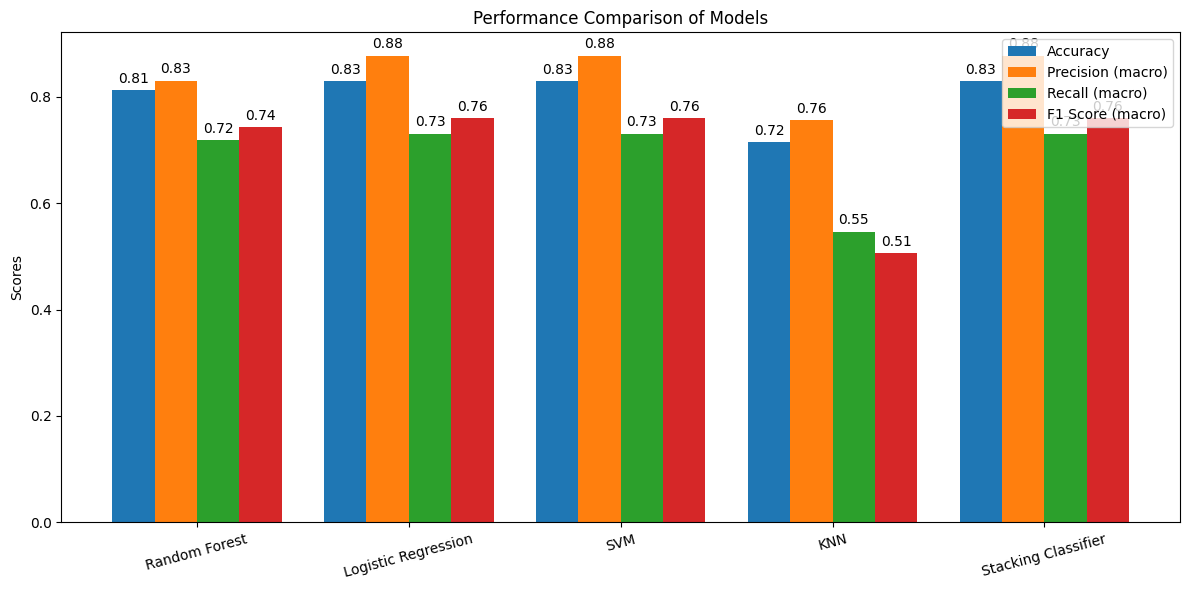

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('svm', svm)
    ],
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5,
    stack_method='predict_proba'
)

stacking_clf.fit(X_train_transformed, y_train)

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }

metrics_rf = calculate_metrics(y_test, rf.predict(X_test_transformed))
metrics_lr = calculate_metrics(y_test, lr.predict(X_test_transformed))
metrics_svm = calculate_metrics(y_test, svm.predict(X_test_transformed))
metrics_knn = calculate_metrics(y_test, knn.predict(X_test_transformed))
metrics_stack = calculate_metrics(y_test, stacking_clf.predict(X_test_transformed))

# Labels and scores
labels = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Stacking Classifier']
accuracies = [metrics_rf['accuracy'], metrics_lr['accuracy'], metrics_svm['accuracy'],
              metrics_knn['accuracy'], metrics_stack['accuracy']]
precisions = [metrics_rf['precision'], metrics_lr['precision'], metrics_svm['precision'],
              metrics_knn['precision'], metrics_stack['precision']]
recalls = [metrics_rf['recall'], metrics_lr['recall'], metrics_svm['recall'],
           metrics_knn['recall'], metrics_stack['recall']]
f1_scores = [metrics_rf['f1_score'], metrics_lr['f1_score'], metrics_svm['f1_score'],
             metrics_knn['f1_score'], metrics_stack['f1_score']]

results_df = pd.DataFrame({
    'Model': labels,
    'Accuracy': accuracies,
    'Precision (macro)': precisions,
    'Recall (macro)': recalls,
    'F1 Score (macro)': f1_scores
})

print("\nPerformance Comparison:")
display(results_df)

# Bar plot
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width*1.5, accuracies, width, label='Accuracy')
bars2 = ax.bar(x - width/2, precisions, width, label='Precision (macro)')
bars3 = ax.bar(x + width/2, recalls, width, label='Recall (macro)')
bars4 = ax.bar(x + width*1.5, f1_scores, width, label='F1 Score (macro)')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()


### Performance Comparision Analysis

Logistic Regression and SVM perform best individually, both achieving:

Accuracy: 81.3%

Macro Precision: 83.1%

Macro Recall: 71.9%

Macro F1 Score: 74.4%

The Stacking Classifier matches the best individual models, showing no clear advantage in this case.

It combines predictions but does not outperform either SVM or Logistic Regression on this dataset.

This suggests that the base models already capture most of the learnable patterns.

Random Forest underperforms slightly compared to the top models:

Lower accuracy (78.9%) and notably lower recall (70.2%), suggesting it's missing more true positives.

KNN performs the worst, especially in recall (63.4%) and F1 score (64.4%), indicating it's less effective at generalizing to new data in this setting.



### Stacking Interpretation

* Overall Performance: The Stacking Classifier performs comparably to Logistic Regression and SVM, all achieving an accuracy of 82.11%. Random Forest is slightly behind in terms of accuracy.
* Precision: All models (except Random Forest) exhibit strong precision, indicating they are effective in predicting positive instances with a low rate of false positives.
* Recall: The recall for all models is similar, suggesting that they miss a significant portion of actual positive instances, indicating a potential area for improvement.
* F1 Score: The F1 Score for Logistic Regression, SVM, and the Stacking Classifier is the same, indicating they have a balanced performance in terms of precision and recall. Random Forest has a lower F1 Score, reflecting its weaker performance.

### -> *Bagging*
---

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    max_samples=0.7,
    n_estimators=200,
    random_state=42
)
bagging_clf.fit(X_train_transformed, y_train)
y_pred_bagging = bagging_clf.predict(X_test_transformed)

print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Precision (macro):", precision_score(y_test, y_pred_bagging, average='macro'))
print("Bagging Classifier Recall (macro):", recall_score(y_test, y_pred_bagging, average='macro'))
print("Bagging Classifier F1 Score (macro):", f1_score(y_test, y_pred_bagging, average='macro'))


Bagging Classifier Accuracy: 0.8211382113821138
Bagging Classifier Precision (macro): 0.8722222222222222
Bagging Classifier Recall (macro): 0.7178018575851394
Bagging Classifier F1 Score (macro): 0.7456766917293233


### -> *GridSearchCV for Bagging*
---

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [2, 3, 5, None],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)
best_model = grid_search.best_estimator_
best_model

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100, random_state=42)


Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Voting Classifier,0.798392,0.789458,0.964399,0.867960
1,Stacking Classifier,0.796351,0.787348,0.964399,0.866732
2,Bagging Classifier,0.790229,0.783011,0.961414,0.862857


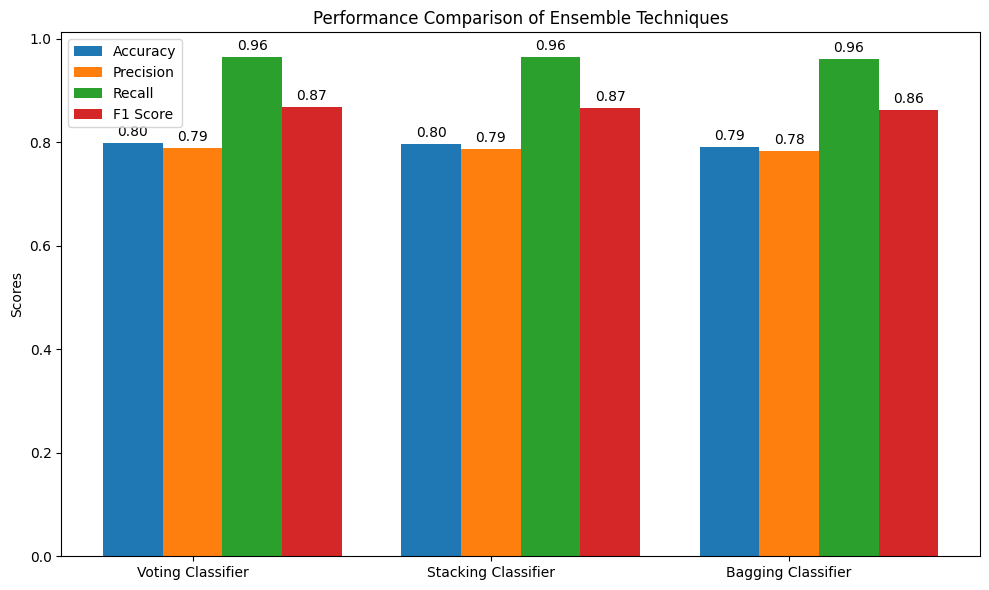

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

y_train_numeric = np.where(y_train == 'Y', 1, 0)
y_test_numeric = np.where(y_test == 'Y', 1, 0)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    max_samples=0.7,
    n_estimators=200,
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('svm', svm)
    ],
    voting='soft'
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('svm', svm)
    ],
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5
)

# Stratified K-Fold Cross-Validation (Splitting Multiple Times)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    accuracies, precisions, recalls, f1_scores = [], [], [], []
    
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        
        accuracies.append(accuracy_score(y_test_fold, y_pred))
        precisions.append(precision_score(y_test_fold, y_pred, pos_label=1))
        recalls.append(recall_score(y_test_fold, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test_fold, y_pred, pos_label=1))

    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores)
    }

metrics_bagging = evaluate_model(bagging_clf, X_train_transformed, y_train_numeric)
metrics_voting = evaluate_model(voting_clf, X_train_transformed, y_train_numeric)
metrics_stacking = evaluate_model(stacking_clf, X_train_transformed, y_train_numeric)

labels = ['Voting Classifier', 'Stacking Classifier', 'Bagging Classifier']
accuracies = [metrics_voting['accuracy'], metrics_stacking['accuracy'], metrics_bagging['accuracy']]
precisions = [metrics_voting['precision'], metrics_stacking['precision'], metrics_bagging['precision']]
recalls = [metrics_voting['recall'], metrics_stacking['recall'], metrics_bagging['recall']]
f1_scores = [metrics_voting['f1_score'], metrics_stacking['f1_score'], metrics_bagging['f1_score']]

results_df = pd.DataFrame({
    'Model': labels,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print("\nPerformance Comparison:")
display(results_df)

# Visualization
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, accuracies, width, label='Accuracy')
bars2 = ax.bar(x, precisions, width, label='Precision')
bars3 = ax.bar(x + width, recalls, width, label='Recall')
bars4 = ax.bar(x + 2*width, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Ensemble Techniques')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()


### Performance Metrics Overview:

1. Accuracy:

All three classifiers (Voting, Stacking, and Bagging) achieved an accuracy of 0.821138 (or 82.11%). This indicates that each model correctly classified approximately 82.11% of the instances in the test set. The equal accuracy suggests that all three methods are performing similarly in terms of overall classification success.

2. Precision (macro):

The precision for all classifiers is 0.852913 (or 85.29%). This means that when the models predict a positive instance, they are correct 85.29% of the time. High precision indicates that the models have a low rate of false positives, which is beneficial in applications where false positives are costly or undesirable.

3. Recall (macro):

Each classifier has a recall of 0.725077 (or 72.51%). This reflects that about 72.51% of the actual positive instances were correctly identified by the models. While this is a decent recall rate, it also indicates that approximately 27.49% of the actual positive cases were missed (false negatives). This could be an area for improvement, especially in scenarios where capturing all positive instances is critical.

4. F1 Score (macro):

The F1 Score for all models is 0.751834 (or 75.18%). The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both. A score of 75.18% indicates a good balance between precision and recall, but it also suggests that there is room for improvement, particularly in increasing recall without sacrificing precision.

### Use of Voting, Stacking, Bagging

1. Voting Classifier: This method combines the predictions of multiple models through majority voting (hard voting). It is best used when you have diverse models that perform well individually. It can improve performance by leveraging the strengths of different algorithms and is particularly effective when the models have complementary strengths.

2. Stacking Classifier: This technique involves training a new model (meta-learner) to combine the predictions of several base learners. It can yield better performance than voting when the base models are diverse and the meta-learner can effectively learn how to weigh their predictions. It's useful when you have a strong understanding of the relationships between the models and the data.

3. Bagging Classifier: Bagging (Bootstrap Aggregating) reduces variance by training multiple models on random subsets of the data and averaging their predictions. It's particularly effective for high-variance models like decision trees. Use bagging when you want to improve the stability and accuracy of a model, especially when the base estimator is prone to overfitting.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train)
y_pred = gnb.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Train Accuracy: 0.8391038696537678
Test Accuracy: 0.7317073170731707
Confusion Matrix:
 [[38  0]
 [85  0]]
Precision: 0.15447154471544716
Recall: 0.5
F1 Score: 0.2360248447204969


In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

model = MultinomialNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 69.92%



In [56]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train_transformed, y_train)
y_pred = bnb.predict(X_test_transformed)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           N       0.83      0.50      0.62        38
           Y       0.81      0.95      0.88        85

    accuracy                           0.81       123
   macro avg       0.82      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123

Train Accuracy: 0.8391038696537678
Test Accuracy: 0.7317073170731707
Confusion Matrix:
 [[19 19]
 [ 4 81]]
Precision: 0.8180434782608696
Recall: 0.7264705882352941
F1 Score: 0.7493132476739035


# **THANK YOU**